In [1]:
import pandas as pd
import numpy as np
import os, random, math
from matplotlib import pyplot
from openalea.vmango.simulation.fruitmodel.fruit_model_main import growth_main
from openalea.vmango.simulation.fruitmodel.fruitmodel import initialize_input
from openalea.vmango.simulation.fruitmodel.fruitmodel_error import FruitModelValueError

In [2]:
path_hourly = '../../share/environment/weather_hourly_stpierre_2002.csv'
path_daily = '../../share/environment/weather_daily_stpierre_2002.csv'
path_sunlit = '../../share/environment/sunlit_fractions.csv'
path_params = '../../share/parameters/fruitmodel/cogshall.toml'

In [3]:
df_input_hourly, df_input_daily, df_sunlit, params = initialize_input(path_hourly, path_daily, path_sunlit, path_params)

In [4]:
bloom_date = '01/11/2002'
nb_fruits = 1
nb_leaves_treatments = [5, 10, 25, 50, 100, 150]

DM_fruit_0 = 0.97 * np.random.normal(13.9, 4.1) + 0.03 * np.random.normal(29.2, 0.66)
sunlit_bs = df_sunlit.iloc[:,random.randrange(0, 5)].to_numpy() 

In [5]:
dfs = []
for i, nb_leaves in enumerate(nb_leaves_treatments):
    df = None
    try:
        df = growth_main(
            bloom_date,
            nb_fruits,
            nb_leaves,
            sunlit_bs,
            df_input_daily,
            df_input_hourly,
            params,
            DM_fruit_0,
            DM_fruit_ini=np.nan,
            sim_date_ini=None,
            dd_thresh=np.nan,
            stop_sim_ddcum=np.nan,
            verbose=False
        )
    except FruitModelValueError as e:
        print(i, nb_leaves, e)
    finally:
        dfs.append(df)
        if df is not None:
            display(df.head())


0 5 Vegetative part of the system dies ...


,DATE,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-03,102.606704,10.741314,82.000376,8.946449,73.464137,7.359349,0.239819,2.615529,-0.675713,...,0.003122,0.004780,0.006972,0.014874,0.006719,0.017351,360.05,10.0,0.155194,63.0
1,2002-11-04,115.458090,10.876908,94.335559,9.056660,84.515227,7.450008,1.286135,1.522909,-0.587780,...,0.002917,0.004209,0.006261,0.013387,0.006260,0.015347,368.55,10.0,0.155194,64.0
2,2002-11-05,129.418433,10.985653,106.748598,9.145046,95.636069,7.522715,1.286135,1.477146,-0.474403,...,0.002769,0.003749,0.005695,0.012213,0.005887,0.013727,377.75,10.0,0.155194,65.0
3,2002-11-06,145.651567,11.035012,121.245182,9.185164,108.623559,7.555716,1.286135,1.432123,-0.429059,...,0.002594,0.003312,0.005129,0.011036,0.005428,0.012170,386.10,10.0,0.155194,66.0
4,2002-11-07,160.165882,11.101004,134.189056,9.238796,120.219975,7.599833,1.286135,1.387830,-0.442699,...,0.002474,0.003001,0.004731,0.010206,0.005121,0.011065,393.80,10.0,0.155194,67.0


,DATE,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-03,102.606704,10.741314,82.000376,8.946449,73.464137,7.359349,0.599548,2.615529,-0.673878,...,0.003122,0.004780,0.006972,0.014874,0.006719,0.017351,360.05,25.0,0.155194,63.0
1,2002-11-04,115.478400,10.989685,94.262093,9.148312,84.449409,7.525401,2.573158,0.589715,-0.589923,...,0.002922,0.004247,0.006317,0.013486,0.006395,0.015504,368.55,25.0,0.155194,64.0
2,2002-11-05,129.667361,11.233318,106.770246,9.346312,95.655463,7.688277,0.580162,2.530958,-0.480400,...,0.002778,0.003816,0.005797,0.012390,0.006147,0.014011,377.75,25.0,0.155194,65.0
3,2002-11-06,146.331302,11.381930,121.571960,9.467085,108.916319,7.787624,2.489957,0.570647,-0.435741,...,0.002604,0.003387,0.005246,0.011237,0.005744,0.012495,386.10,25.0,0.155194,66.0
4,2002-11-07,161.387237,11.564064,134.906493,9.615076,120.862727,7.909362,0.561403,2.449121,-0.450255,...,0.002486,0.003087,0.004867,0.010440,0.005502,0.011440,393.80,25.0,0.155194,67.0


,DATE,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-03,102.606704,10.741314,82.000376,8.946449,73.464137,7.359349,1.199096,2.615529,-0.672860,...,0.003122,0.004780,0.006972,0.014874,0.006719,0.017351,360.05,50.0,0.155194,63.0
1,2002-11-04,115.489662,11.052228,94.221355,9.199135,84.412912,7.567209,2.573158,1.179431,-0.591395,...,0.002924,0.004268,0.006348,0.013540,0.006470,0.015592,368.55,50.0,0.155194,64.0
2,2002-11-05,129.801746,11.351406,106.794631,9.442268,95.677310,7.767210,1.160324,2.530958,-0.483411,...,0.002781,0.003847,0.005844,0.012472,0.006272,0.014144,377.75,50.0,0.155194,65.0
3,2002-11-06,146.666307,11.531239,121.750636,9.588405,109.076395,7.887422,2.489957,1.141295,-0.438427,...,0.002606,0.003418,0.005294,0.011319,0.005881,0.012630,386.10,50.0,0.155194,66.0
4,2002-11-07,161.951658,11.767004,135.247047,9.779959,121.167830,8.044994,1.122806,2.449121,-0.453220,...,0.002489,0.003123,0.004924,0.010536,0.005671,0.011601,393.80,50.0,0.155194,67.0


,DATE,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-03,102.606704,10.741314,82.000376,8.946449,73.464137,7.359349,2.398192,2.615529,-0.672538,...,0.003122,0.004780,0.006972,0.014874,0.006719,0.017351,360.05,100.0,0.155194,63.0
1,2002-11-04,115.493220,11.071993,94.208481,9.215196,84.401378,7.580420,2.573158,2.358862,-0.592133,...,0.002925,0.004274,0.006358,0.013557,0.006494,0.015619,368.55,100.0,0.155194,64.0
2,2002-11-05,129.840627,11.370135,106.814230,9.457488,95.694869,7.779729,2.320648,2.530958,-0.484655,...,0.002781,0.003851,0.005851,0.012483,0.006291,0.014163,377.75,100.0,0.155194,65.0
3,2002-11-06,146.722691,11.492461,121.832633,9.556900,109.149856,7.861506,2.489957,2.282589,-0.437316,...,0.002603,0.003407,0.005277,0.011287,0.005839,0.012583,386.10,100.0,0.155194,66.0
4,2002-11-07,161.935184,11.714385,135.275045,9.737209,121.192913,8.009828,2.245612,2.449121,-0.451574,...,0.002486,0.003111,0.004905,0.010503,0.005622,0.011550,393.80,100.0,0.155194,67.0


,DATE,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-03,102.606704,10.741314,82.000376,8.946449,73.464137,7.359349,3.597288,2.615529,-0.673076,...,0.003122,0.004780,0.006972,0.014874,0.006719,0.017351,360.05,150.0,0.155194,63.0
1,2002-11-04,115.487270,11.038949,94.230004,9.188345,84.420661,7.558332,2.573158,3.538292,-0.591693,...,0.002924,0.004263,0.006342,0.013529,0.006454,0.015573,368.55,150.0,0.155194,64.0
2,2002-11-05,129.765150,11.284655,106.816097,9.388031,95.696542,7.722594,3.480972,2.530958,-0.483556,...,0.002778,0.003828,0.005816,0.012422,0.006199,0.014065,377.75,150.0,0.155194,65.0
3,2002-11-06,146.482362,11.297384,121.775933,9.398387,109.099058,7.731113,2.489957,3.423884,-0.433224,...,0.002596,0.003362,0.005207,0.011165,0.005654,0.012389,386.10,150.0,0.155194,66.0
4,2002-11-07,161.377050,11.450212,134.989878,9.522569,120.937432,7.833265,3.368417,2.449121,-0.446545,...,0.002479,0.003061,0.004825,0.010365,0.005397,0.011328,393.80,150.0,0.155194,67.0


### Lechaudel 2007, p. 226, fruit fresh matter vs days after bloom

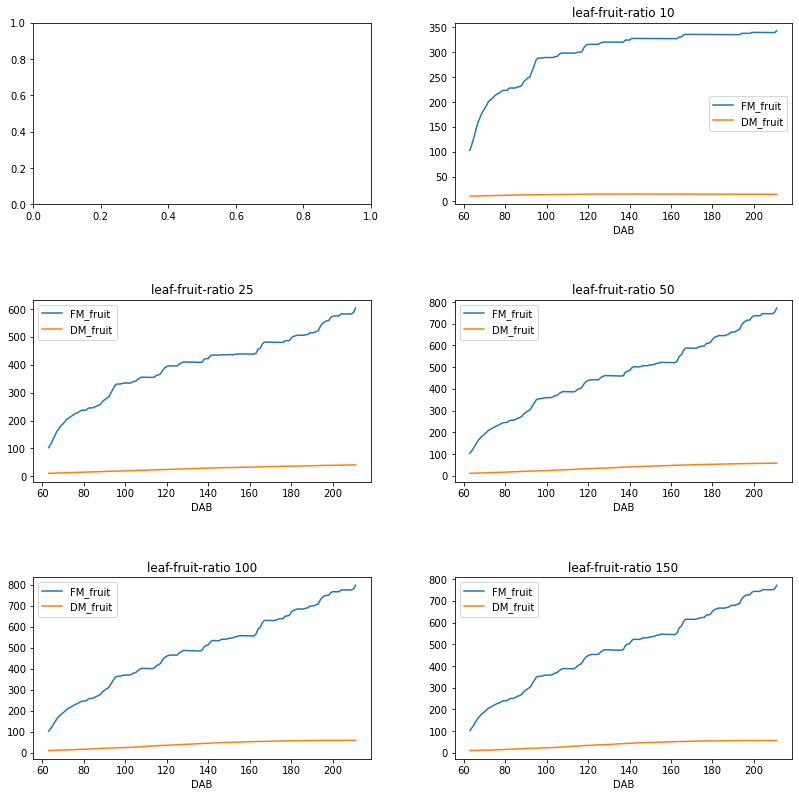

In [6]:
fig_1, axs_1 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_1 = axs_1.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['DAB', 'FM_fruit', 'DM_fruit']].plot(
            x=0, y=[1, 2], title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_1[i], figsize=(12,12))

### Lechaudel 2005, p. 589, stem and leaf reserves vs days after bloom

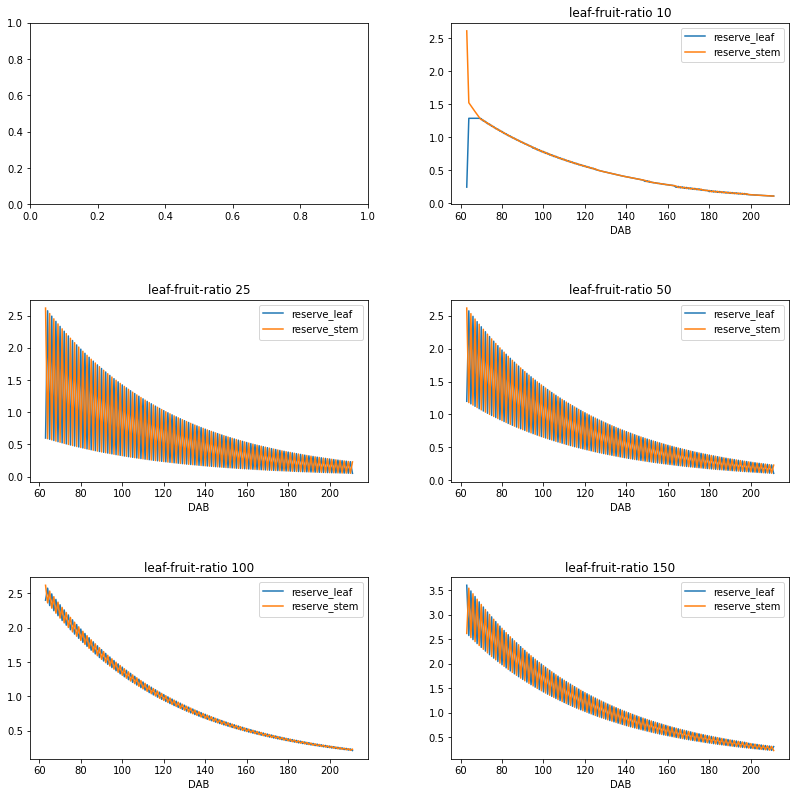

In [7]:
fig_2, axs_2 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_2 = axs_2.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['DAB', 'reserve_leaf', 'reserve_stem']].plot(
            x=0, y=[1, 2], title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_2[i], figsize=(12,12))

### Lechaudel 2005, p. 590, fruit dry matter vs degree days

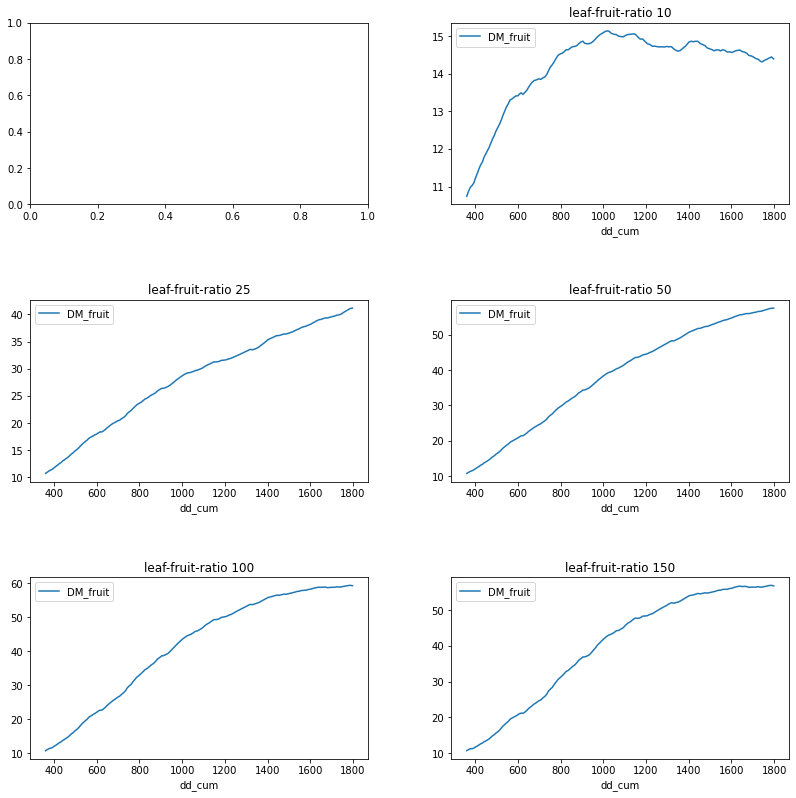

In [8]:
fig_3, axs_3 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_3 = axs_3.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['dd_cum', 'DM_fruit']].plot(
            x=0, y=1, title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_3[i], figsize=(12,12))